# E-Commerce – EDA – Python Project 2 

# Context of Data
Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missing no as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv('Ecommerce - UK Retailer.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1. Perform Basic EDA
>a. Boxplot – All Numeric Variables

In [5]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


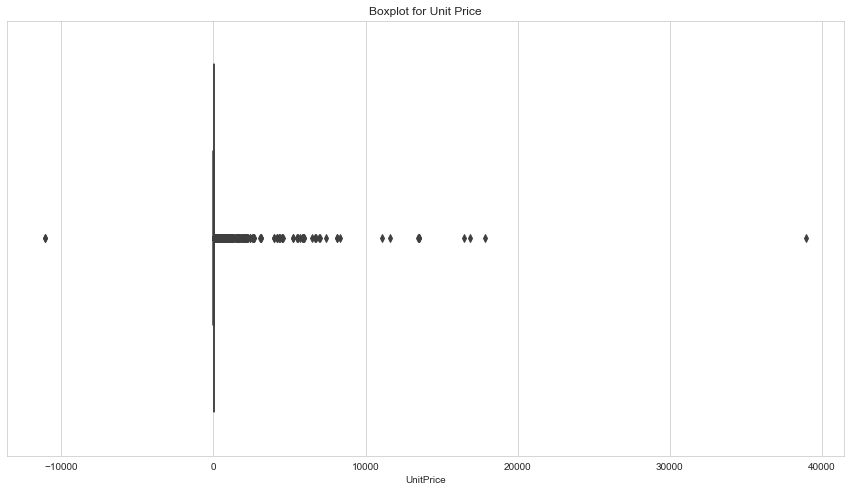

In [6]:
# boxplot for unit_price
plt.subplots(figsize=(15,8))
sns.boxplot(df.UnitPrice)
plt.xlabel("UnitPrice")
plt.title("Boxplot for Unit Price")
plt.show()

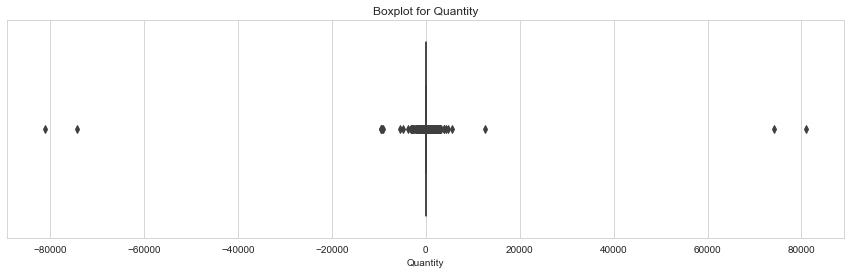

In [7]:
# boxplot for quantity
plt.subplots(figsize=(15,4))
sns.boxplot(df.Quantity)
plt.xlabel("Quantity")
plt.title("Boxplot for Quantity")
plt.show()

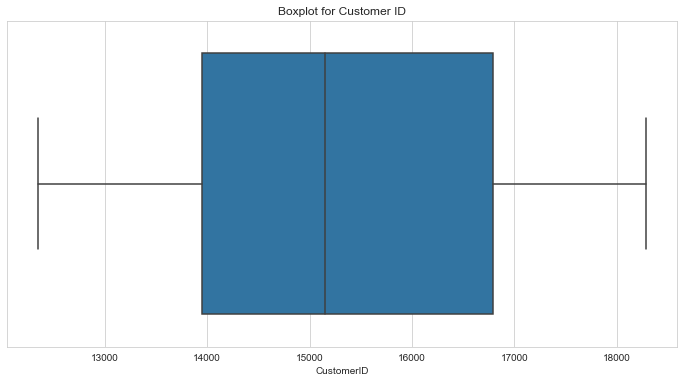

In [8]:
# boxplot for Customer ID
plt.subplots(figsize=(12,6))
sns.boxplot(df.CustomerID)
plt.xlabel("CustomerID")
plt.title("Boxplot for Customer ID")
plt.show()

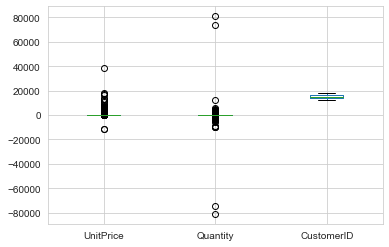

In [9]:
# boxplot for all 3 numeric fields
df.boxplot(column=["UnitPrice","Quantity","CustomerID"]);

>b. Histogram – All Numeric Variables 

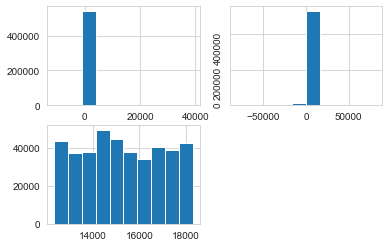

In [10]:
plt.subplot(2,2,1)
plt.hist(df["UnitPrice"])
plt.show;
plt.subplot(2,2,2)
plt.hist(df["Quantity"])
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(df["CustomerID"])
plt.show;

>c. Distribution Plot – All Numeric Variables

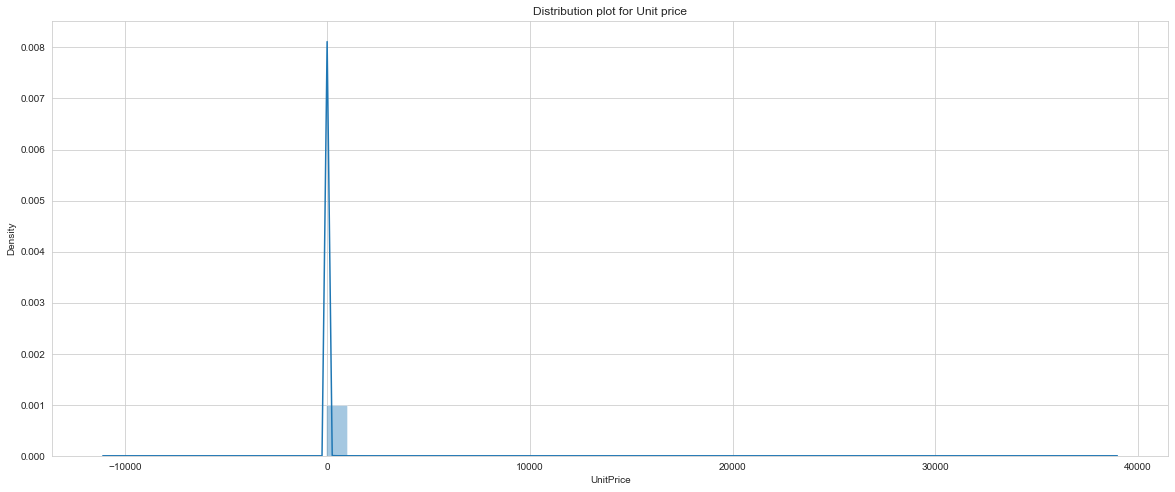

In [11]:
# Distribution plot for Unit price
plt.subplots(figsize=(20,8))
sns.distplot(df['UnitPrice'])
plt.title("Distribution plot for Unit price")
plt.show()
#sns.distplot(df.UnitPrice, kde=False);

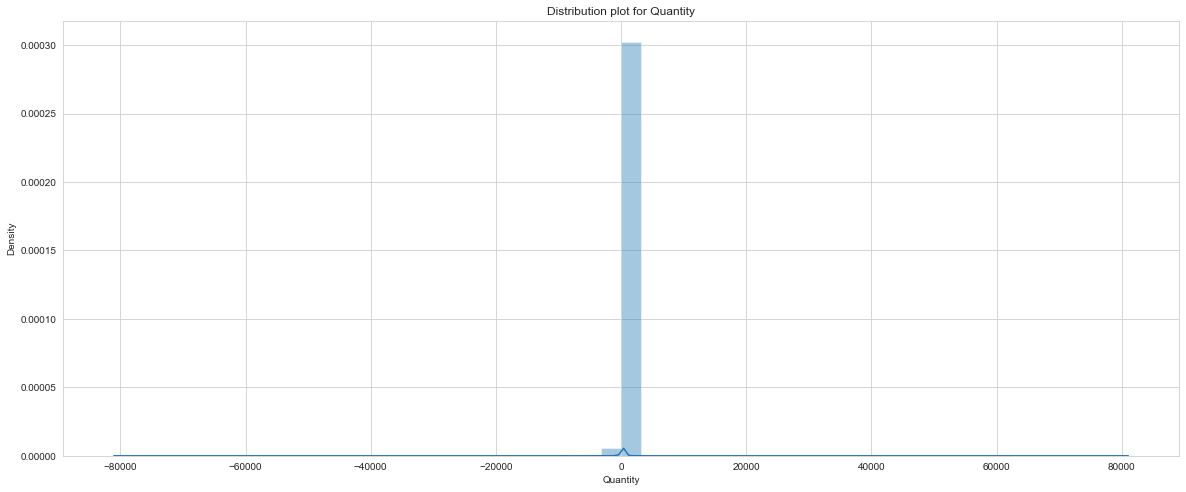

In [12]:
# Distribution plot for Quantity
plt.subplots(figsize=(20,8))
sns.distplot(df['Quantity'])
plt.title("Distribution plot for Quantity")
plt.show()
#sns.distplot(df.Quantity, kde=False);

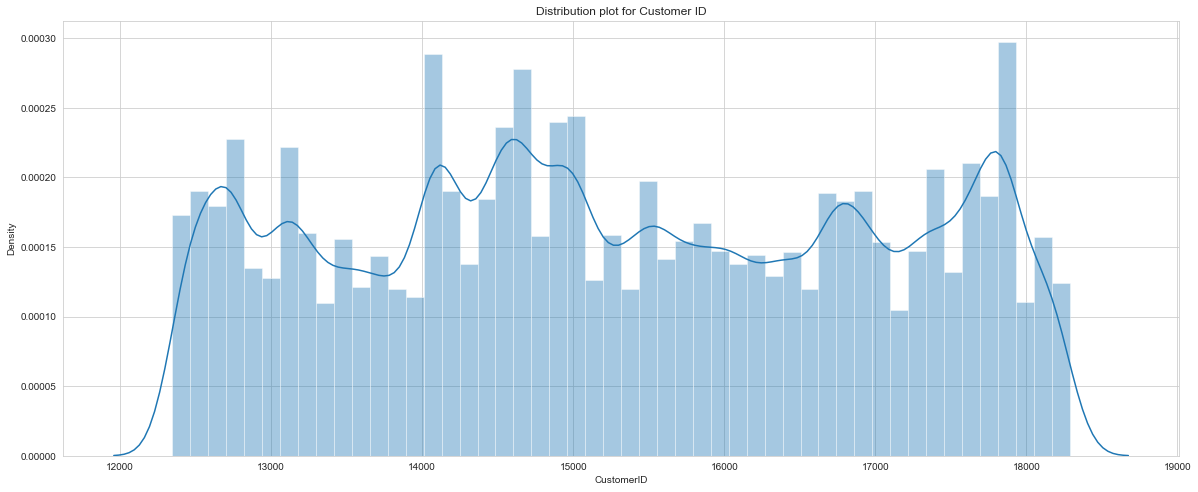

In [13]:
# Distribution plot for Customer ID
plt.subplots(figsize=(20,8))
sns.distplot(df['CustomerID'])
plt.title("Distribution plot for Customer ID")
plt.show()
#sns.distplot(df.CustomerID, kde=False);

>d. Aggregation for all numerical Columns

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
x=df[["UnitPrice","Quantity","CustomerID"]]

In [16]:
x.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


In [17]:
x.sum()

UnitPrice     2.498804e+06
Quantity      5.176450e+06
CustomerID    6.219476e+09
dtype: float64

In [18]:
x.mean()

UnitPrice         4.611114
Quantity          9.552250
CustomerID    15287.690570
dtype: float64

In [19]:
x.median()

UnitPrice         2.08
Quantity          3.00
CustomerID    15152.00
dtype: float64

In [20]:
x.std()

UnitPrice       96.759853
Quantity       218.081158
CustomerID    1713.600303
dtype: float64

In [21]:
x.max()

UnitPrice     38970.0
Quantity      80995.0
CustomerID    18287.0
dtype: float64

In [22]:
x.min()

UnitPrice    -11062.06
Quantity     -80995.00
CustomerID    12346.00
dtype: float64

>e. Unique Values across all columns

In [23]:
for col in df:
    print(df[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

In [24]:
print('total unique and nom-unique value of each column :')
df.count(axis=0)

total unique and nom-unique value of each column :


InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [25]:
print('total unique value of each column :')
df.nunique(axis=0)

total unique value of each column :


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

>f. Duplicate values across all columns

In [26]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [27]:
df.shape

(541909, 8)

>g. Correlation – Heatmap - All Numeric Variables

In [28]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [29]:
# roughwork n_df=df.pivot(index='CustomerID',columns="UnitPrice",values="Quantity")

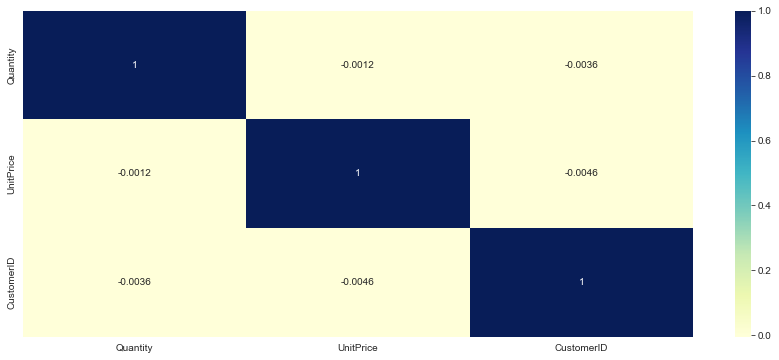

In [30]:
plt.figure(figsize=(15, 6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

>h. Regression Plot - All Numeric Variables 

<Figure size 1440x576 with 0 Axes>

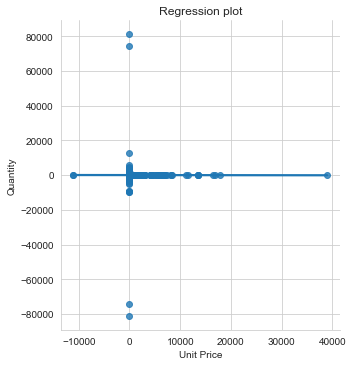

In [31]:
plt.figure(figsize=(20, 8))
sns.lmplot(x = "UnitPrice",
            y = "Quantity", 
            ci = None,            
            data = df)
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.title("Regression plot")
plt.show()

>i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


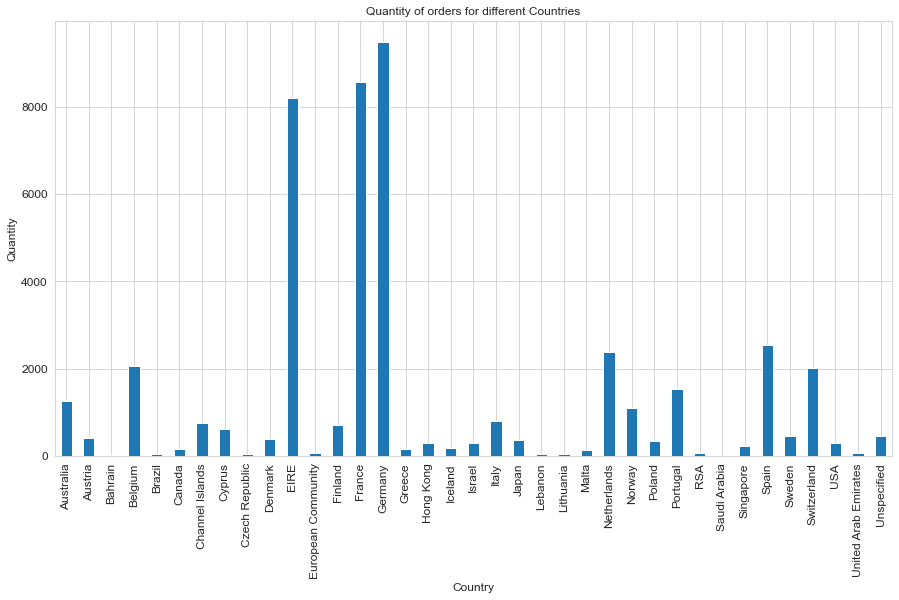

In [33]:
x=df.groupby('Country')['Quantity'].count()
del x['United Kingdom']
plt.subplots(figsize=(15,8))
x.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity of orders for different Countries', fontsize=12)
plt.show()

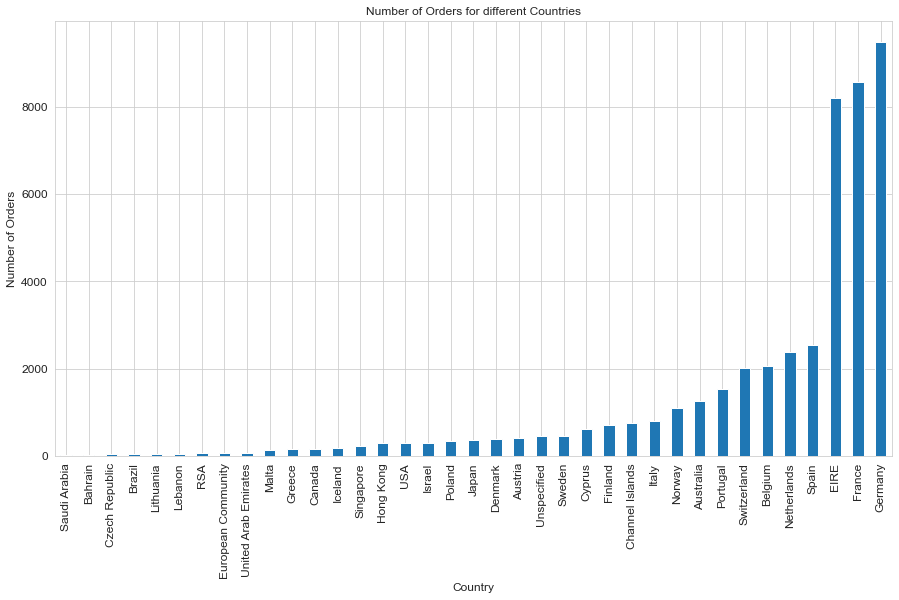

In [34]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom'] # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

>j. Pair plot - All Numeric Variables 

In [35]:
# Pair plot allows us to see both distribution of single variables and relationships between two variables.
# sns.pairplot(df,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
# plt.show()

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


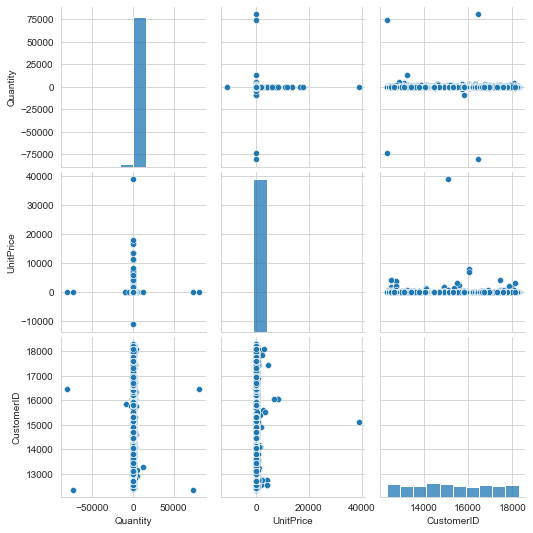

In [37]:
pp=sns.pairplot(df, diag_kws = {"bins": 10})

>k. Line chart to show the trend of data - All Numeric/Date Variables 

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [39]:
tt=df.copy()

In [40]:
import datetime as dt

tt.head()

tt['InvoiceDate'] = pd.to_datetime(tt.InvoiceDate, format='%m/%d/%Y %H:%M')

tt.insert(loc=2, column='Year_month', value=tt['InvoiceDate'].map(lambda x: 100*x.year + x.month))
tt.insert(loc=3, column='Month', value=tt.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
tt.insert(loc=4, column='Day', value=(tt.InvoiceDate.dt.dayofweek)+1)
tt.insert(loc=5, column='Hour', value=tt.InvoiceDate.dt.hour)


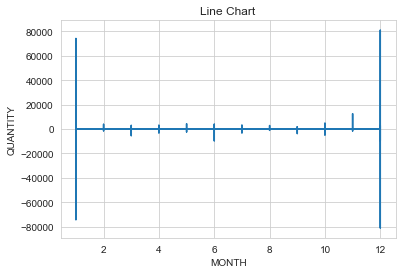

In [41]:
plt.figure()
x= tt['Month']
y = tt['Quantity']
plt.xlabel("MONTH")  # add X-axis label
plt.ylabel("QUANTITY")  # add Y-axis label
plt.title("Line Chart")
plt.plot(x,y)

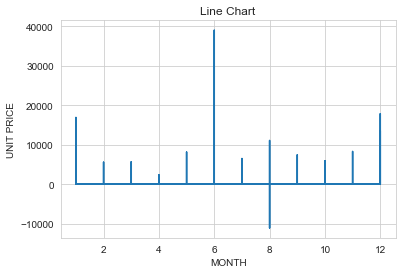

In [42]:
plt.figure()
x= tt['Month']
y = tt['UnitPrice']
plt.xlabel("MONTH")  # add X-axis label
plt.ylabel("UNIT PRICE")  # add Y-axis label
plt.title("Line Chart")
plt.plot(x,y)

>l. Plot the skewness - All Numeric Variables 

In [43]:
skewness=pd.DataFrame(df)
print(df.skew())

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64


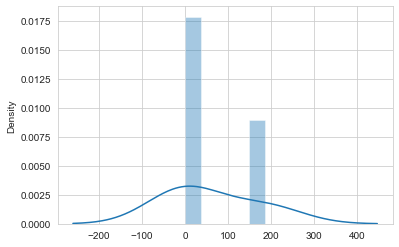

In [44]:
sns.distplot(df.skew(), bins=5)
plt.show()

### 2. Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode)

In [45]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<AxesSubplot:xlabel='CustomerID'>

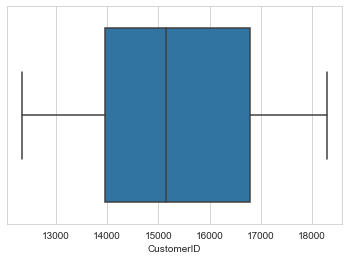

In [46]:
sns.boxplot(df["CustomerID"])

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

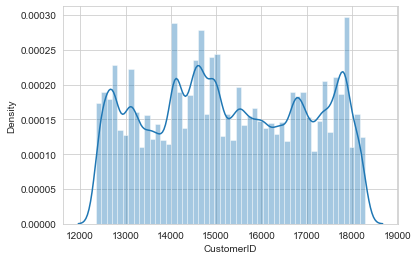

In [47]:
sns.distplot(df["CustomerID"])

As the data distribution is symmetric the appropriate metric is mean .So, we have to replace missing values with mean

In [48]:
x=df["CustomerID"].mean()
type(x)

numpy.float64

In [49]:
int(x)

15287

In [50]:
df['CustomerID']=df["CustomerID"].fillna(x)

In [51]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. Remove duplicate rows

In [54]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [55]:
df=df.drop_duplicates(keep=False)

In [56]:
df.shape

(530308, 8)

In [57]:

df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


there are no duplicated values

### 4. Remove rows which have negative values in Quantity column

In [58]:
(df["Quantity"]<0).sum()

9693

In [59]:
df.drop(df[df["Quantity"]<0].index,inplace=True)

In [60]:
(df["Quantity"]<0).sum()

0

In [61]:
df.shape

(520615, 8)

### 5. Add the columns - Month, Day and Hour for the invoice

In [62]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [63]:
import datetime as dt

In [64]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [66]:
df.insert(loc=2, column='Year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='Month', value=df.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='Hour', value=df.InvoiceDate.dt.hour)

In [67]:
df.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 6. How many orders made by the customers?

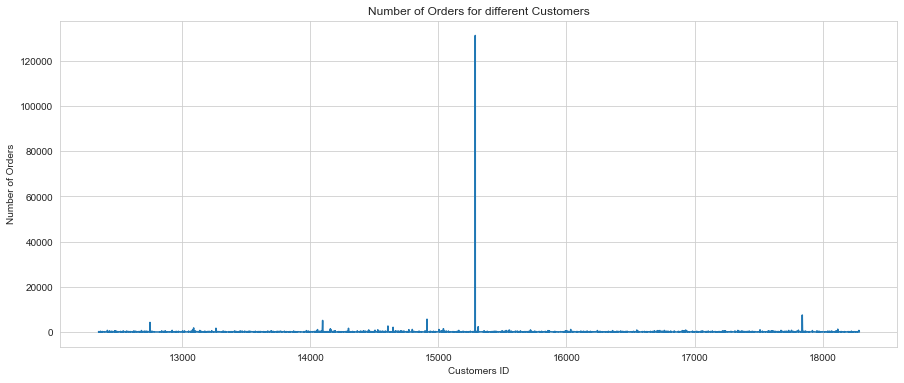

In [68]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [69]:
index = pd.Index(df['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 520615


In [70]:
total_order=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


### 7. TOP 5 customers with higher number of orders

In [71]:
orders['CustomerID'] = orders['CustomerID'].astype('int64')

In [72]:
print('The TOP 5 customers with most number of orders based on total order...')
total_order.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders based on total order...


,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


In [73]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
2176,15287,United Kingdom,131300
4028,17841,United Kingdom,7523
1888,14911,EIRE,5667
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4243


### 8. How much money spent by the customers?

In [74]:
df['Amount_Spent'] = df['Quantity'] * df['UnitPrice']

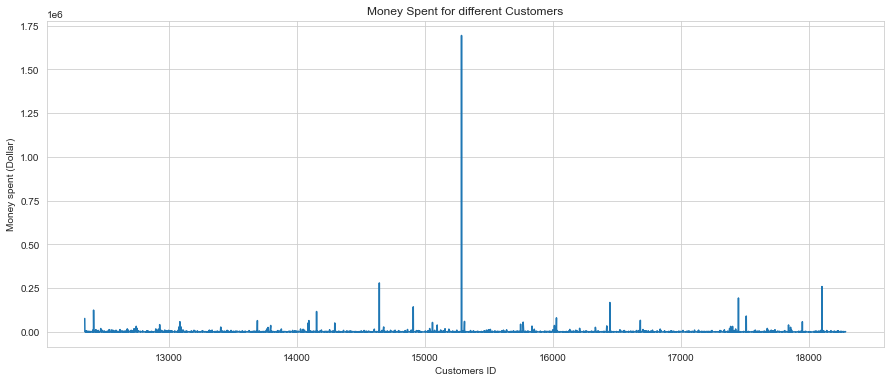

In [75]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [76]:
df.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [77]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()
print(money_spent)

      CustomerID         Country  Amount_Spent
0        12346.0  United Kingdom      77183.60
1        12347.0         Iceland       4310.00
2        12348.0         Finland       1797.24
3        12349.0           Italy       1757.55
4        12350.0          Norway        334.40
...          ...             ...           ...
4351     18280.0  United Kingdom        180.60
4352     18281.0  United Kingdom         80.82
4353     18282.0  United Kingdom        178.05
4354     18283.0  United Kingdom       1998.68
4355     18287.0  United Kingdom       1837.28

[4356 rows x 3 columns]


### 9. TOP 5 customers with highest money spent

In [78]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='Amount_Spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,Amount_Spent
2176,15287.69057,United Kingdom,1694485.90
1698,14646.00000,Netherlands,280206.02
4219,18102.00000,United Kingdom,259657.30
3746,17450.00000,United Kingdom,194230.79
3026,16446.00000,United Kingdom,168472.50


### 10. How many orders per month?

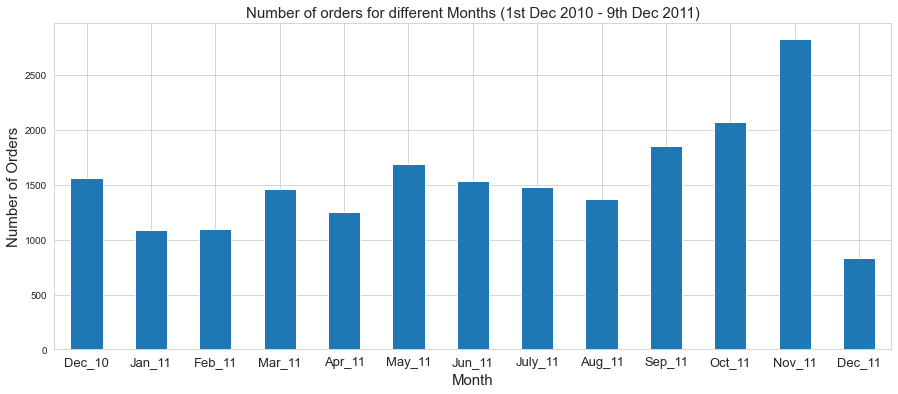

In [79]:
ax = df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [80]:
ax = df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520615 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     520615 non-null  object        
 1   StockCode     520615 non-null  object        
 2   Year_month    520615 non-null  int64         
 3   Month         520615 non-null  int64         
 4   Day           520615 non-null  int64         
 5   Hour          520615 non-null  int64         
 6   Description   520615 non-null  object        
 7   Quantity      520615 non-null  int64         
 8   InvoiceDate   520615 non-null  datetime64[ns]
 9   UnitPrice     520615 non-null  float64       
 10  CustomerID    520615 non-null  float64       
 11  Country       520615 non-null  object        
 12  Amount_Spent  520615 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 55.6+ MB


### 11. How many orders per day?

In [82]:
ax = df.groupby('InvoiceNo')['Day'].value_counts()
ax

InvoiceNo  Day
536365     3       7
536366     3       2
536367     3      12
536368     3       4
536369     3       1
                  ..
581586     5       4
581587     5      15
A563185    5       1
A563186    5       1
A563187    5       1
Name: Day, Length: 20134, dtype: int64

In [83]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts()
#.value_counts().sort_index()

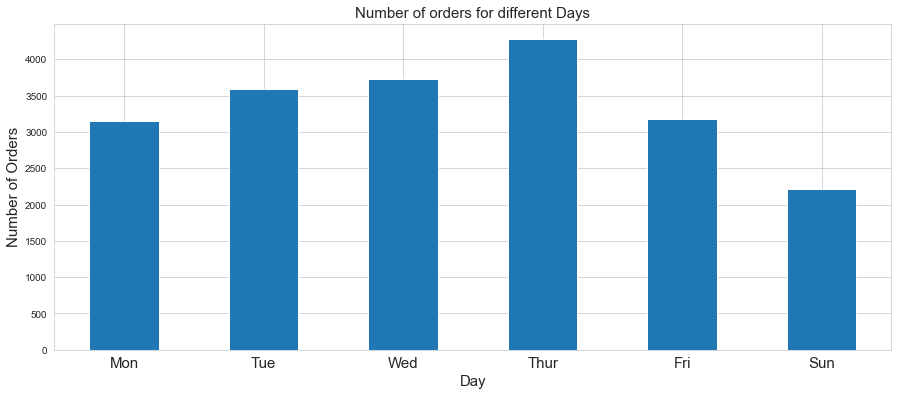

In [84]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

### 12. How many orders per hour?

In [85]:
a=df['Hour'].value_counts().sort_index()

In [86]:
ax= df.groupby('InvoiceNo')['Hour'].unique().value_counts()

#value_counts().sort_index()

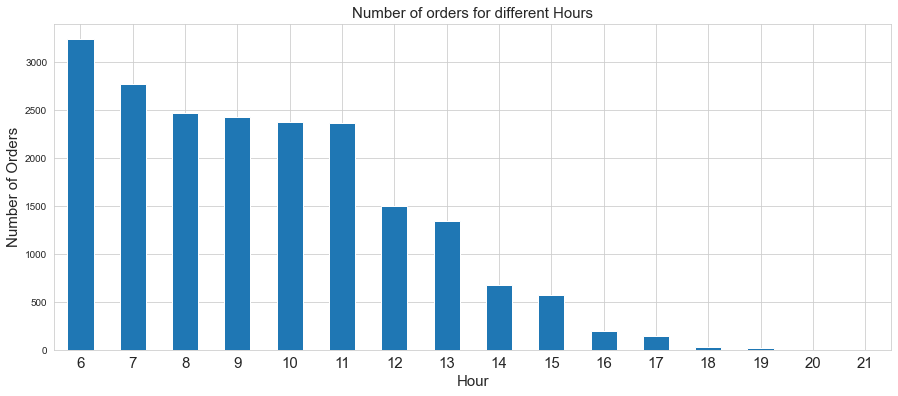

In [87]:
ax= df.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

###  13. How many orders for each country?

In [88]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  276
Israel                     289
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                438
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1484
Switzerland               1951
Belgium                   2031


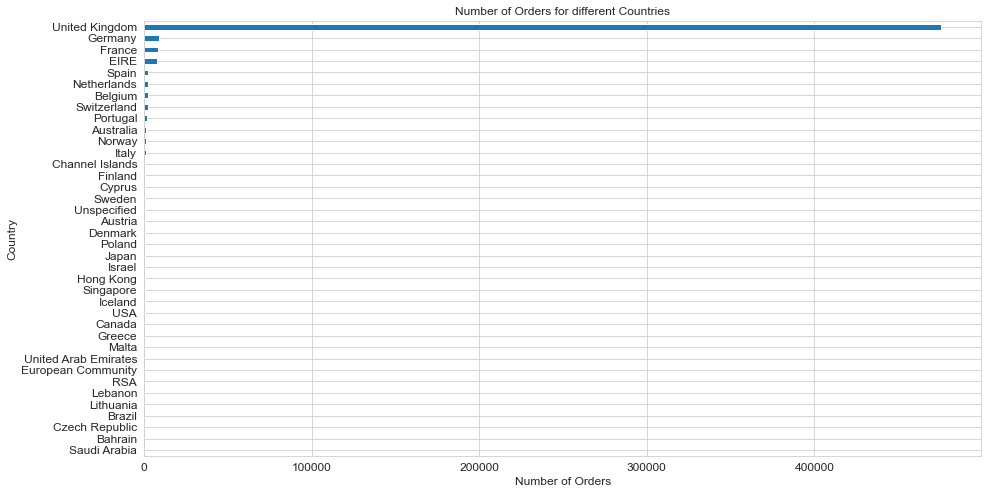

In [89]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

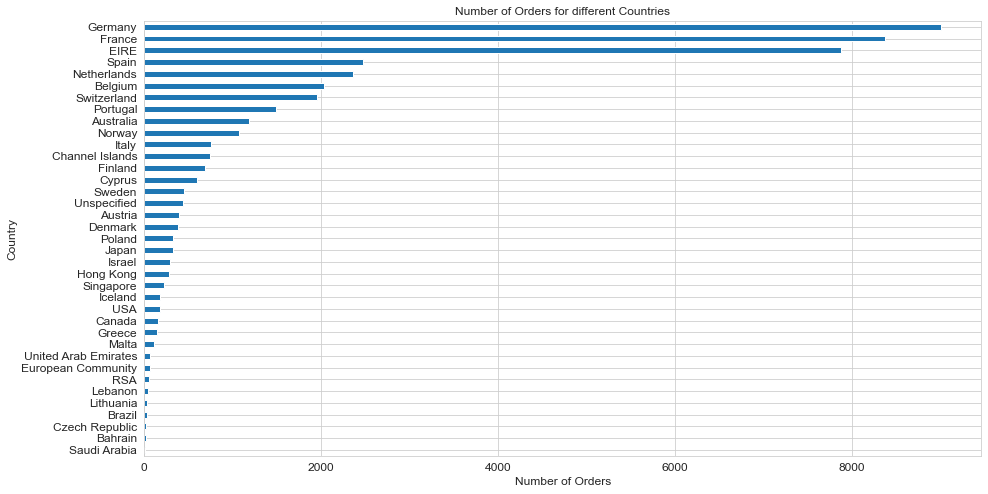

In [90]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### 14. Orders trend across months 

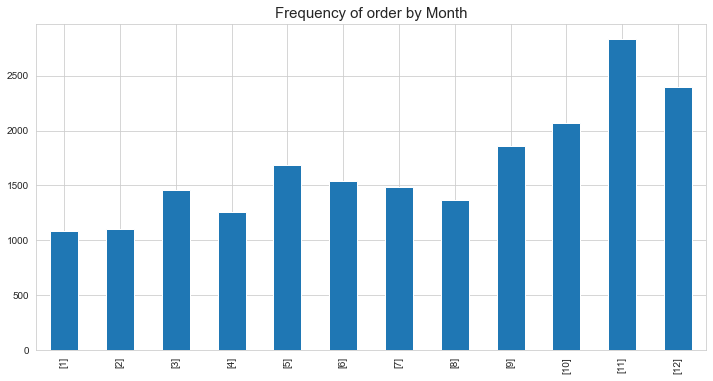

In [91]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
invoice_date = df.groupby(['InvoiceNo'])['Month'].unique()
invoice_date.value_counts().sort_index().plot.bar()
plt.show()

In [92]:
df_free = df[df.UnitPrice == 0]

In [93]:
df_free.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
6391,536941,22734,201012,12,5,12,amazon,20,2010-12-03 12:08:00,0.0,15287.69057,United Kingdom,0.0
6392,536942,22139,201012,12,5,12,amazon,15,2010-12-03 12:08:00,0.0,15287.69057,United Kingdom,0.0
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.00000,Germany,0.0
14335,537534,85064,201012,12,2,11,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,15287.69057,United Kingdom,0.0
14336,537534,84832,201012,12,2,11,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,15287.69057,United Kingdom,0.0


In [94]:
df_free.Month.value_counts().sort_index()

1      13
2      54
3      40
4      12
5      84
6      37
7      16
8      39
9      24
10     33
11     75
12    150
Name: Month, dtype: int64

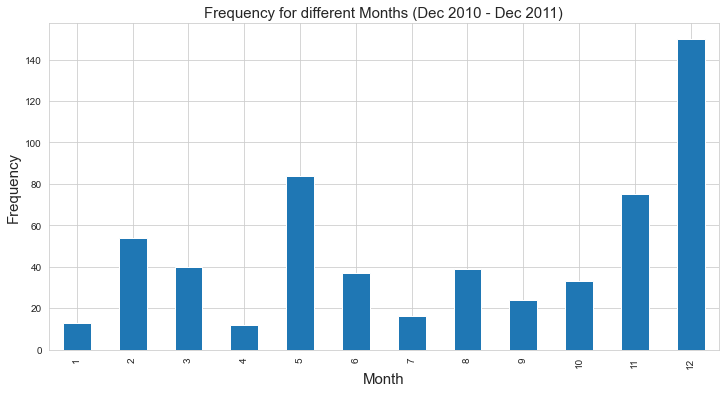

In [95]:
ax = df_free.Month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
#ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

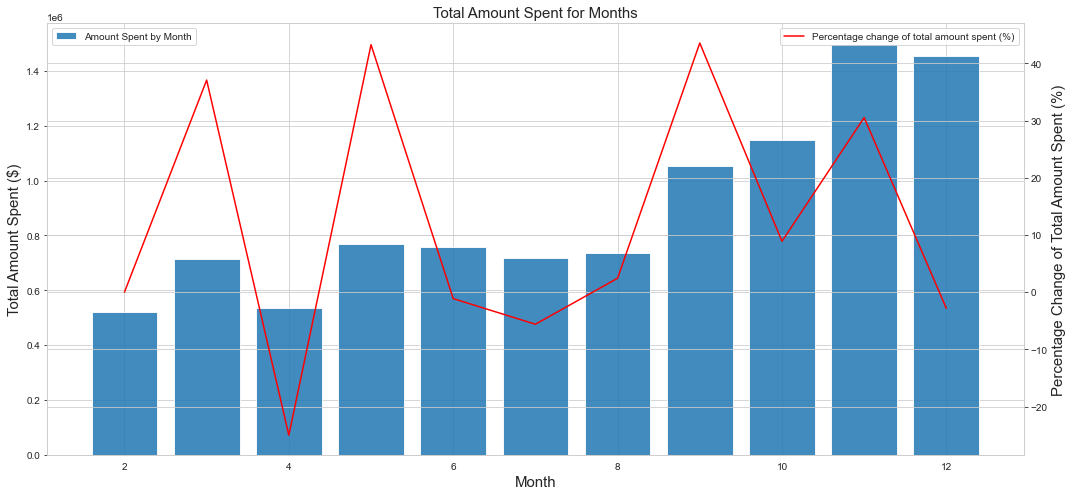

In [96]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df.groupby(by=['Month'])['Amount_Spent'].sum().index.tolist()[1:],
        df.groupby(by=['Month'])['Amount_Spent'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df.groupby(by=['Month'])['Amount_Spent'].sum().index.tolist()[1:], 
         df.groupby(by=['Month'])['Amount_Spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

### 15. How much money spent by each country?

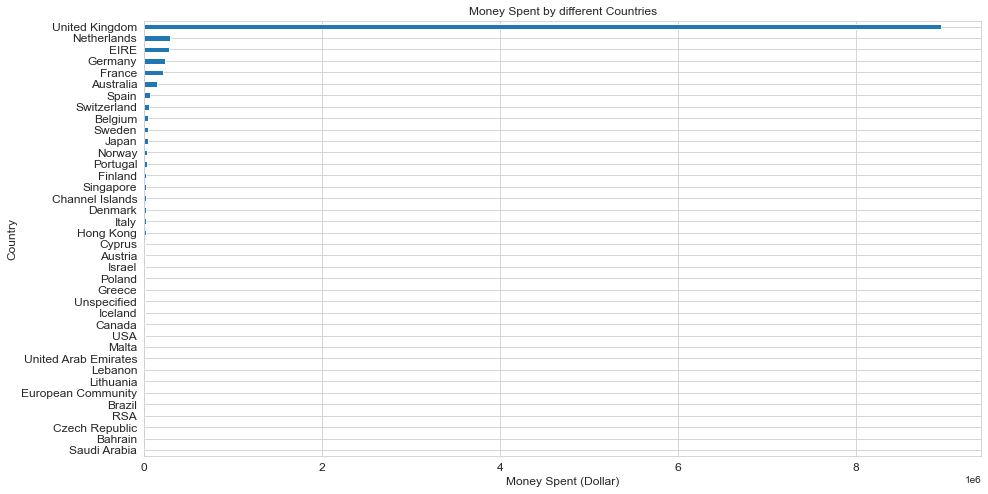

In [97]:
group_country_amount_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

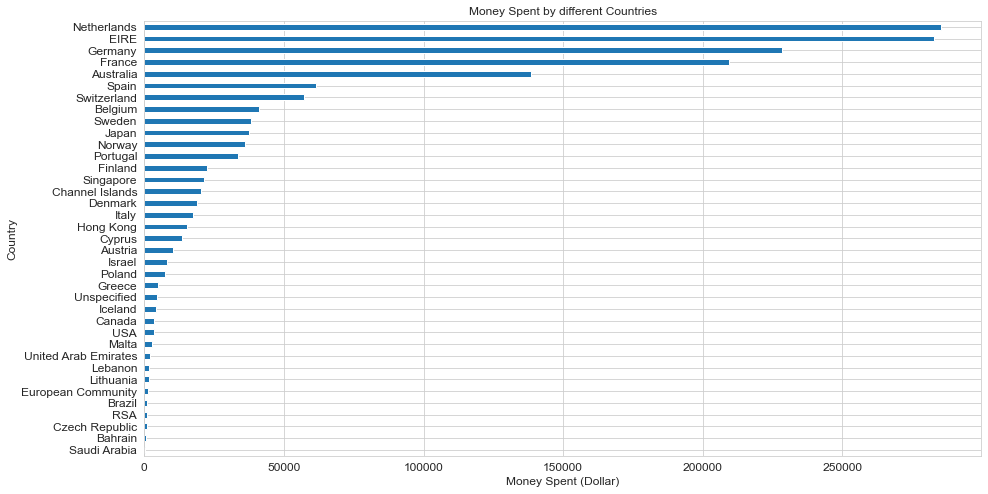

In [98]:
group_country_amount_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## end of assignment 2 E-Commerce UK retailer